In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read stock price
import pandas_datareader as pdr

In [2]:
# Get Teslat Stock Data from Yahoo
tesla = pdr.get_data_yahoo('TSLA')

In [4]:
# Check the data fetched from pandas_datareader
tesla.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1882.000000,1882.000000,1882.000000,1882.000000,1882.000000,1.882000e+03
mean,152.505558,155.046759,149.797535,152.489303,152.489303,4.510667e+06
std,108.003096,109.438092,106.404423,107.981936,107.981936,4.243807e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,31.175000,31.884999,30.575000,31.275000,31.275000,1.309225e+06
50%,187.760002,191.540001,183.000000,188.045006,188.045006,3.583000e+06
75%,234.212502,237.537502,229.264995,232.487499,232.487499,6.036950e+06
max,386.690002,389.609985,379.350006,385.000000,385.000000,3.716390e+07


In [5]:
# Only check the data of last 2 years
past_2_years = -(365*2)
tesla_latest = tesla[past_2_years : ]

In [7]:
tesla_latest.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-27,204.419998,208.029999,203.300003,205.979996,205.979996,2781000
2015-01-28,206.110001,206.369995,198.419998,199.369995,199.369995,3149600
2015-01-29,201.070007,205.979996,196.500000,205.199997,205.199997,3548100
2015-01-30,203.960007,207.470001,203.000000,203.600006,203.600006,3007000
2015-02-02,203.970001,211.949997,203.300003,210.940002,210.940002,4149200


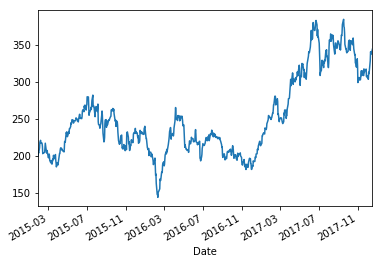

In [59]:
# Basic line chart for Close price
tesla_latest.Close.plot();


In [78]:
# Check if the stock price is above the purchase price 
ave_buy_price = 315 # assumed purchased at 300usd

tesla_latest["P/L"] = tesla_latest.Close > ave_buy_price


/Users/ruyi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


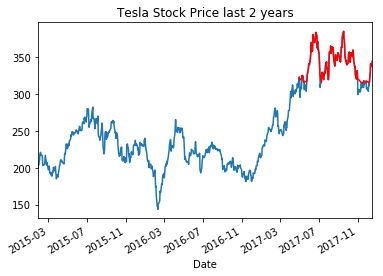

In [79]:
# Use "Red line" to mark the days when the close price is above the purchase price
tesla_latest.Close.plot(title = 'Tesla Stock Price last 2 years');
tesla_latest[tesla_latest["P/L"] == True].Close.plot(c='r');

In [80]:
# Detail check - zoom in to last 30 days data
last_month = tesla[-30 : ]

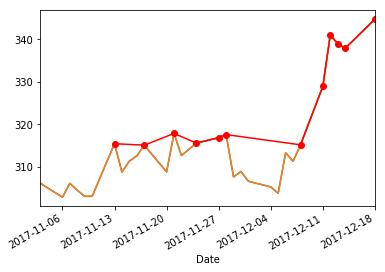

In [81]:
last_month.Close.plot();

plt.plot(last_month.index ,last_month.Close)
plt.plot(last_month[last_month.Close > ave_buy_price].index, 
         last_month[last_month.Close > ave_buy_price].Close,
        'r', marker = 'o')

In [82]:
last_month[last_month.Close > ave_buy_price].index

DatetimeIndex(['2017-11-13', '2017-11-17', '2017-11-21', '2017-11-24',
               '2017-11-27', '2017-11-28', '2017-12-08', '2017-12-11',
               '2017-12-12', '2017-12-13', '2017-12-14', '2017-12-18'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [83]:
last_month[last_month.Close > ave_buy_price].Close

Date
2017-11-13    315.399994
2017-11-17    315.049988
2017-11-21    317.809998
2017-11-24    315.549988
2017-11-27    316.809998
2017-11-28    317.549988
2017-12-08    315.130005
2017-12-11    328.910004
2017-12-12    341.029999
2017-12-13    339.029999
2017-12-14    337.890015
2017-12-18    344.787811
Name: Close, dtype: float64

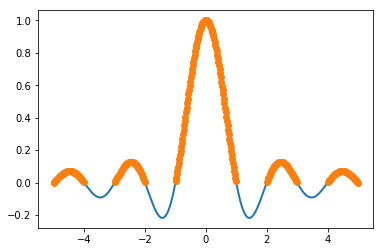

In [84]:
x= np.linspace(-5, 5, 500)
y = np.sinc(x)
plt.plot(x, y, lw=2);

# Mark y > 0 with different color
plt.plot(x[y>0] , y[y>0], 'o', lw =1)